<a href="https://colab.research.google.com/github/LeadShadow/hw4_data_science/blob/main/Hw4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
from scipy.integrate import quad, solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [46]:
a = 0.5
b = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0, t_f = 0, 25

In [47]:
def func1(t, S):
    return (-(a * S))

soln_1 = solve_ivp(func1, (t_0, t_f), [S_0], dense_output=True)
print(soln_1)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fa4e6299670>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


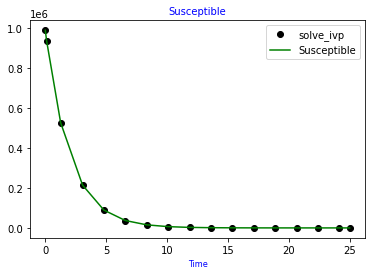

In [56]:
t1, y1 = soln_1.t, soln_1.y[0]
z1, = soln_1.sol(t1)
plt.plot(t1, y1, 'o', color='k', label='solve_ivp')
plt.plot(t1, z1, color='green', label='Susceptible')

plt.title('Susceptible', fontsize=10, color='blue')
plt.xlabel('Time', fontsize=8, color='blue') 

plt.legend()
plt.show()

Решить дифференциальное уравнение (3) и построить график функции 
I(t)

In [49]:
def dIdt(t, I):
    return ((a * soln_1.sol(t)) - (b * I))

soln_2 = solve_ivp(dIdt, (t_0, t_f), [I_0], dense_output=True)
print(soln_2)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fa4e5ff6a60>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08332734, 446699.01195851, 319077.83028019,
        165571.99131376,  71966.74863635,  29712.58392623,
         12130.57394035,   5009.75291414,   2075.26330114,
          1367.85128541]])
 y_events: None


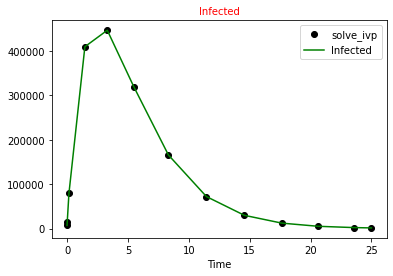

In [58]:
t2, y2 = soln_2.t, soln_2.y[0]
z2, = soln_2.sol(t2)
plt.plot(t2, y2, 'o', color='k', label='solve_ivp')
plt.plot(t2, z2, color='green', label='Infected')

plt.title('Infected', fontsize=10, color='red')
plt.xlabel('Time', fontsize=10) 

plt.legend()
plt.show()

In [59]:
R = N - soln_1.sol(soln_2.t)[0] - y
interp_3 = interp1d(soln_2.t, R, kind='linear')
interp_3

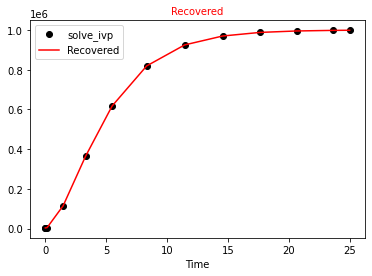

In [60]:
plt.plot(t2, R, 'o', color='k', label='solve_ivp')
plt.plot(t2, interp_3(t2), color='red', label='Recovered')

plt.title('Recovered', fontsize=10, color='red')
plt.xlabel('Time', fontsize=10) 

plt.legend()
plt.show()

Построить все три графика 
S(t)
I(t)
R(t) на одной области отображения

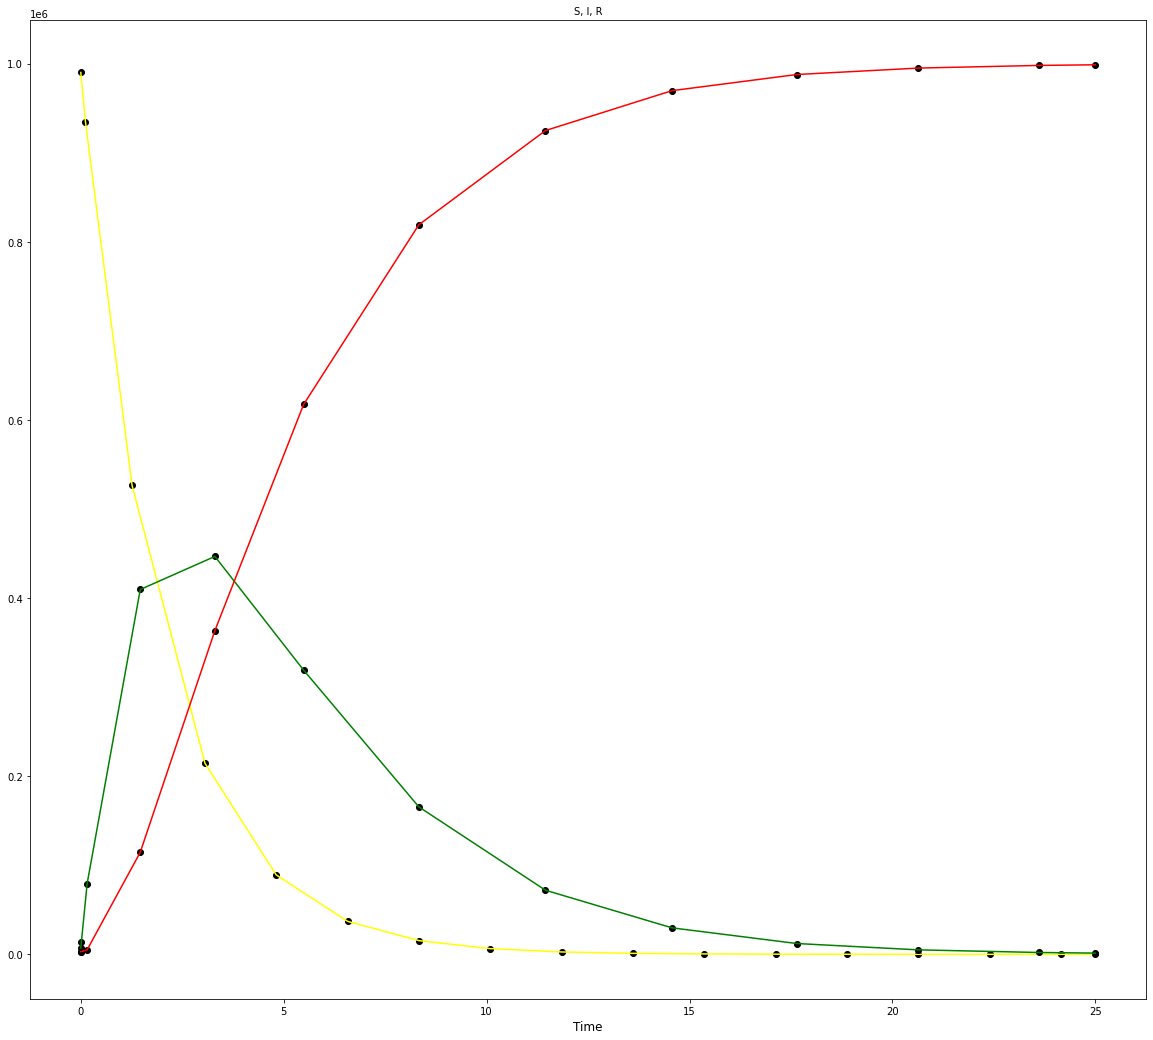

In [62]:
fig, ax = plt.subplots(figsize=(20, 18))

plt.title('S, I, R', fontsize=10, color='black')
plt.xlabel('Time', fontsize=12, color='black')

plt.plot(t1, y1, 'o', color='k', label='solve_ivp')
plt.plot(t1, z1, color='yellow', label='Susceptible')

plt.plot(t2, y2, 'o', color='k', label='solve_ivp')
plt.plot(t2, z2, color='green', label='Infected')

plt.plot(t2, R, 'o', color='k', label='solve_ivp')
plt.plot(t2, interp_3(t2), color='red', label='Recovered')